# divmod for the win
I had a situation recently where I had a list of values laid out in a grid like so:
<img src="layout_example.jpg"></img><p/>
I had to figure out the row and column positions for each value.

So, let's start with a list of numbers:

In [1]:
some_list = [i for i in range(15)]
print(some_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

First, how can I easily figure out what row each number belongs to?  If you said "[mod](https://docs.python.org/3.5/library/operator.html#operator.mod)," you'd be right!  You take the *mod* of the number divided by the size of the group: in this case, 5:

In [3]:
group_size = 5
for n in some_list:
    print('Number {0} belongs to row {1}'.format(n, n % group_size))

Number 0 belongs to row 0
Number 1 belongs to row 1
Number 2 belongs to row 2
Number 3 belongs to row 3
Number 4 belongs to row 4
Number 5 belongs to row 0
Number 6 belongs to row 1
Number 7 belongs to row 2
Number 8 belongs to row 3
Number 9 belongs to row 4
Number 10 belongs to row 0
Number 11 belongs to row 1
Number 12 belongs to row 2
Number 13 belongs to row 3
Number 14 belongs to row 4


Now, how do I figure out what column each value belongs to?  For that, I need to *divide* each number by the group size and take the [int](https://www.geeksforgeeks.org/python-int-function/) portion of the value.  An easier way to do that is to use Python [floor division](https://python-reference.readthedocs.io/en/latest/docs/operators/floor_division.html):

In [4]:
group_size = 5
for n in some_list:
    print('Number {0} belongs to column {1}'.format(n, n // group_size))

Number 0 belongs to column 0
Number 1 belongs to column 0
Number 2 belongs to column 0
Number 3 belongs to column 0
Number 4 belongs to column 0
Number 5 belongs to column 1
Number 6 belongs to column 1
Number 7 belongs to column 1
Number 8 belongs to column 1
Number 9 belongs to column 1
Number 10 belongs to column 2
Number 11 belongs to column 2
Number 12 belongs to column 2
Number 13 belongs to column 2
Number 14 belongs to column 2


But I really need *both* the row and column values together.  Sure, I could write my *mod* operation on one line and my *floor division* operation on another, but Python has a cool function to do both at the same time: [divmod](https://docs.python.org/3.5/library/functions.html#divmod):

In [5]:
group_size = 5
for n in some_list:
    col, row = divmod(n, group_size)
    print('Number {0} belongs at row {1}, column {2}'.format(n, row, col))

Number 0 belongs at row 0, column 0
Number 1 belongs at row 1, column 0
Number 2 belongs at row 2, column 0
Number 3 belongs at row 3, column 0
Number 4 belongs at row 4, column 0
Number 5 belongs at row 0, column 1
Number 6 belongs at row 1, column 1
Number 7 belongs at row 2, column 1
Number 8 belongs at row 3, column 1
Number 9 belongs at row 4, column 1
Number 10 belongs at row 0, column 2
Number 11 belongs at row 1, column 2
Number 12 belongs at row 2, column 2
Number 13 belongs at row 3, column 2
Number 14 belongs at row 4, column 2


But now let's get more real and use this feature to write out one of the greatest catalogs of all time: the [albums](https://en.wikipedia.org/wiki/%22Weird_Al%22_Yankovic_discography) of "Weird Al" Yankovic:

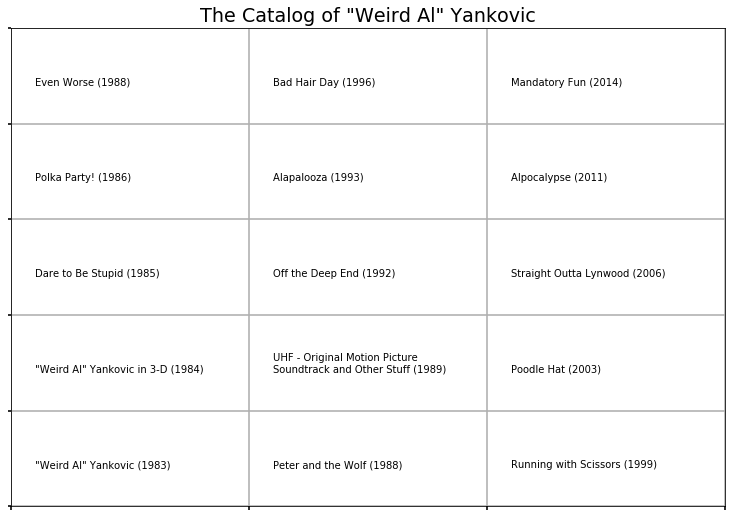

In [18]:
import matplotlib.style as style
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
style.use('seaborn-poster')

group_size = 5
albums = ['"Weird Al" Yankovic (1983)', 
          '"Weird Al" Yankovic in 3-D (1984)',
          'Dare to Be Stupid (1985)',
          'Polka Party! (1986)',
          'Even Worse (1988)',
          'Peter and the Wolf (1988)',
          'UHF - Original Motion Picture\nSoundtrack and Other Stuff (1989)',
          'Off the Deep End (1992)',
          'Alapalooza (1993)',
          'Bad Hair Day (1996)',
          'Running with Scissors (1999)',
          'Poodle Hat (2003)',
          'Straight Outta Lynwood (2006)',
          'Alpocalypse (2011)',
          'Mandatory Fun (2014)']

# set up my grid chart
fig, ax = plt.subplots()
ax.set_xticks(np.arange(0, (len(albums)/group_size) + 1))
ax.set_yticks(np.arange(0, group_size + 1))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title('The Catalog of "Weird Al" Yankovic')
plt.grid()

# now, enumerate through the album list and use divmod to get row and column values to write out the album names
for i, album in enumerate(albums):
    col, row = divmod(i, group_size)
    ax.annotate(album, xy=(col+.1, row+.4), xytext=(col+.1, row+.4))